In [1]:
# system libraries
import os
import warnings
warnings.filterwarnings("ignore")
from time import time
import gc
import timeit


# data structure libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

# data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import SVG
import seaborn as sns
import cv2 as cv

# deep learning libraries
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from keras import backend as K
from keras.models import load_model

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

In [2]:
# Google Drive connexion
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Paramêtres pour charger les images
path = '/content/drive/MyDrive/FORMATION/P7/images/'
img_width, img_height = 224, 224
channels = 3
batch_size = 32
image_arr_size= img_width * img_height * channels

In [4]:
#Création d'un jeu d'entrainement avec 20% du jeu de données initial
train_set = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [ ]:
#Navigation au sein du répertoire
!dir /content/drive/MyDrive

20191016_130237.jpg
20191016_130242.jpg
20191016_131250.jpg
20191016_151335.jpg
20191016_151339.jpg
20191016_151352.jpg
Colab\ Notebooks
FORMATION
google-chrome-portable_59-0-3071-109_fr_384150_online.paf.zip
Google Photos


In [5]:
# Afficher le nom des répertoires
class_names = train_set.class_names
print(class_names)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [6]:
def show_images_classes(path, classes, num_sample):
    """Fonction pour afficher les n premières images d'une race
    passée en argument

    Paramètres
    ----------------------------------------
    path : string
        Link of root directory
    classes : string 
        Name of the subdirectory
    num_smaple : integer
        Number of picture to show
    ----------------------------------------
    """
    fig = plt.figure(figsize=(20,20))
    fig.patch.set_facecolor('#343434')
    plt.suptitle("{}".format(classes.split("-")[1]), y=.83,
                 color="white", fontsize=22)
    images = os.listdir(path + "/" + classes)[:num_sample]
    for i in range(num_sample):
        img = mpimg.imread(path+"/"+classes+"/"+images[i])
        plt.subplot(num_sample/5+1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

In [7]:
#Affichage du nombre de races différentes
images_dir = '/content/drive/MyDrive/FORMATION/P7/images'
breed_list = os.listdir(images_dir)
print("Nombre de races différentes:", (len(breed_list)))

Nombre de races différentes: 120


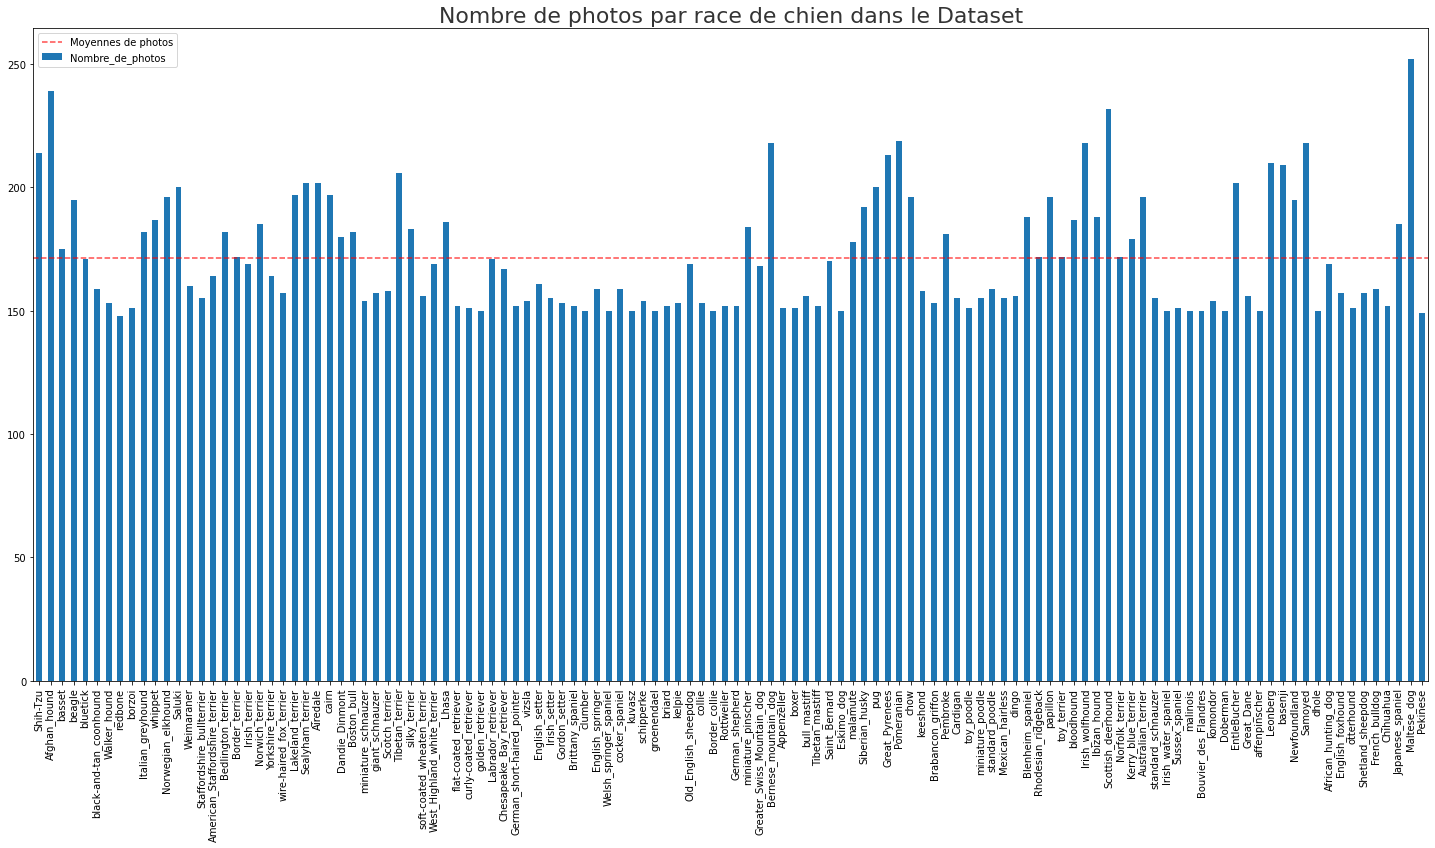

In [ ]:
# Compte le nombre d'image par race
df_breeds = pd.DataFrame(
    index=[breed.split('-',1)[1]
           for breed in breed_list],
    data=[len(os.listdir(images_dir + "/" + name))
          for name in breed_list],
    columns=["Nombre_de_photos"])

# Affiche un graphique
fig, ax = plt.subplots(1, 1, figsize=(25,12))
df_breeds.plot(kind="bar",
               legend=False,
               ax=ax)
ax.axhline(df_breeds["Nombre_de_photos"].mean(),
           color='r', alpha=.7,
           linestyle='--',
           label="Moyennes de photos")
plt.title("Nombre de photos par race "\
          "de chien dans le Dataset",
          color="#343434", fontsize=22)
plt.legend()
plt.show()

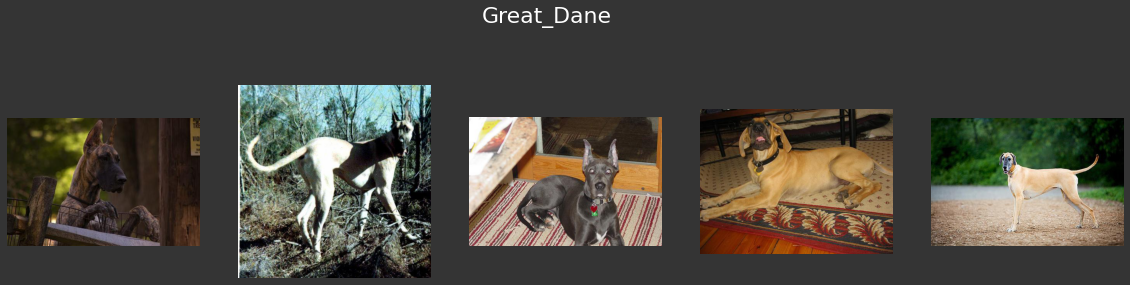

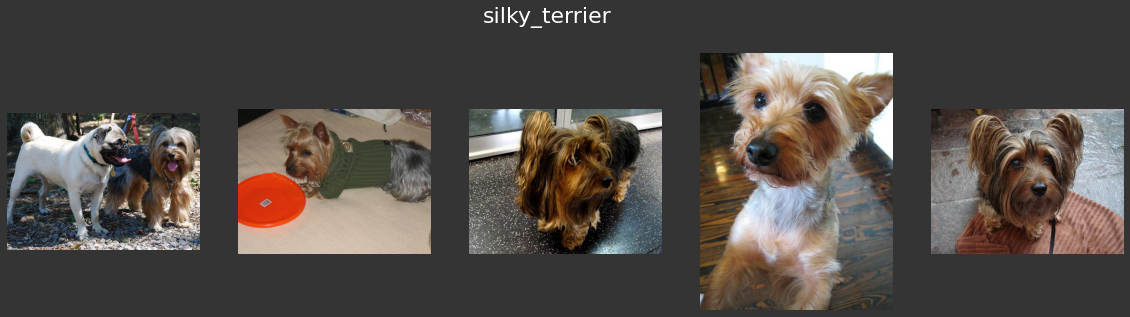

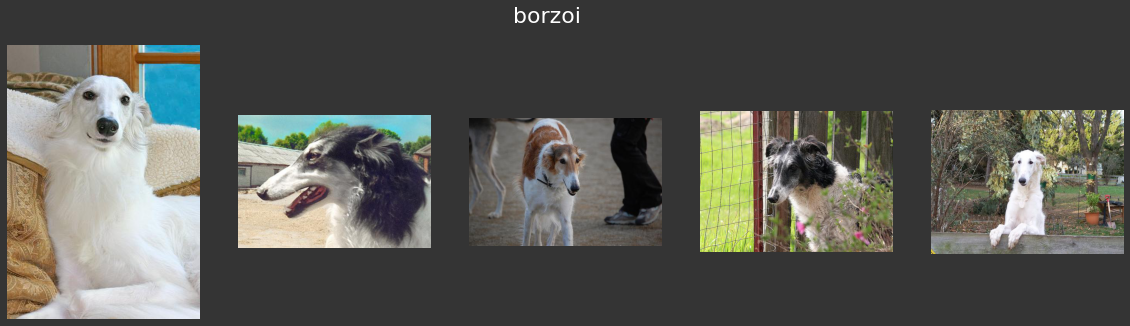

In [ ]:
#Affichage d'images
for i in np.random.randint(0, len(breed_list), size=3):
    show_images_classes(images_dir, breed_list[i], 5)

##Fonction de préprocessing
* Pour CNN
* Pour SIFT

In [8]:
#Création d'une liste de race à traiter. Ceci afin de restreindre la durée de mes traitements
fr_breed_list = [
    'n02096294-Australian_terrier',
    'n02093256-Staffordshire_bullterrier',
    'n02099601-golden_retriever',
    'n02106662-German_shepherd',
    'n02086240-Shih-Tzu',
    'n02099712-Labrador_retriever',
    'n02088364-beagle',
    'n02100735-English_setter',
    'n02102318-cocker_spaniel',
    'n02108915-French_bulldog',
    'n02094433-Yorkshire_terrier',
    'n02085620-Chihuahua',
    'n02110185-Siberian_husky',
    'n02106166-Border_collie',
    'n02106550-Rottweiler']

In [9]:
#Fonction de preprocessing pour CNN
def preprocessing_cnn(directories, img_width, img_height,gray):
    """Fonction de préprocessing pour utliser un CNN (Convolutional Neural Network)
    Les traitements sont les suivant Redimensionnement, Egalisation, suppression du bruit, transformation en tableau 

    Paramètres
    ---------------------------------------------------
    directoriesList : list
        Liste des images à traiter
    img_width : integer
        Largeur souhaitée après le rédimensionnement 
    img_height : integer
        Hauteur souhaitée après le rédimensionnement
    ---------------------------------------------------
    """
    img_list=[]
    labels=[]
    for index, breed in enumerate(directories):
        for image_name in os.listdir(images_dir+"/"+breed):
            # Lecture de l'image
            img = cv.imread(images_dir+"/"+breed+"/"+image_name)
            img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
            # Redimensionnement de l'image par interpolation bilinéaire
            dim = (img_width, img_height)
            img = cv.resize(img, dim, interpolation=cv.INTER_LINEAR)
            # Egalisation
            img_yuv = cv.cvtColor(img,cv.COLOR_BGR2YUV)
            img_yuv[:,:,0] = cv.equalizeHist(img_yuv[:,:,0])
            img_equ = cv.cvtColor(img_yuv, cv.COLOR_YUV2RGB)
            # Suppression du bruit (Erreur de pixel qui pourrait baisser les performances de nos algorithmes)
            dst_img = cv.fastNlMeansDenoisingColored(
                src=img_equ,
                dst=None,
                h=10,
                hColor=10,
                templateWindowSize=7,
                searchWindowSize=21)
            
            # Conversion en tableau
            img_array = image.img_to_array(dst_img)
            
            # Création de notre liste retour avec l'image et les étiquettes
            img_list.append(np.array(img_array))
            labels.append(breed.split("-")[1])
    
    return img_list, labels

In [ ]:
#Fonction de pre processing + détection des features pour la méthode classique avec SIFT
def preprocessing_sift(directories, img_width, img_height):
    """Fonction de préprocessing pour utliser SIFT
    Les traitements sont les suivant Redimensionnement, Passage en noir et blanc,Egalisation, Détection des features
    Simultaneous creation of labels (y). 

    Paramètres
    ---------------------------------------------------
    directoriesList : list
        Liste des images à traiter
    img_width : integer
        Largeur souhaitée après le rédimensionnement 
    img_height : integer
        Hauteur souhaitée après le rédimensionnement
    ---------------------------------------------------
    """
    img_list=[]
    labels=[]
    descriptors=[]
    for index, breed in enumerate(directories):
        for image_name in os.listdir(images_dir+"/"+breed):
            # Lecture de l'image
            img = cv.imread(images_dir+"/"+breed+"/"+image_name)
            img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
            # Redimensionnement de l'image
            dim = (img_width, img_height)
            img = cv.resize(img, dim, interpolation=cv.INTER_LINEAR)
            #Passage en noir et blanc
            img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            # Egalisation
            img_equ = cv.equalizeHist(img_gray)
            
            #Détection des features
            orb = cv.ORB_create(nfeatures=200)
            kp, des = orb.detectAndCompute(img_equ,None)

            # Création de notre liste de retour avec l'image, les étiquettes et les descripteurs
            img_list.append(img_equ)
            labels.append(breed.split("-")[1])
            descriptors.append(des)
    
    return img_list, labels, descriptors

## Méthode classique SIFT (La scale-invariant feature transform)


In [ ]:
#Création de 200 features par images, 32 taille du vecteur qui décrit mon descripteur
#Présence de 2522 images
#flat_descriptors fait une taille de 504 400 sur 32

num_breeds = len(fr_breed_list) 

# Execute preprocessor on selection
start_time = timeit.default_timer()
# X = images
# y = labels
#Appel du préprocessing et du calcul des descripteurs
img_array, y, descriptors = preprocessing_sift(fr_breed_list, 299, 299)

#Mise à plat de tous les descritpeurs
flat_descriptors = np.concatenate(list(descriptors), axis=0)


NameError: ignored

In [ ]:
len(flat_descriptors)

498997

In [ ]:
#On doit retrouver nbre d'image par nombre descripteur
print(flat_descriptors.shape)
print(len(descriptors))

(498997, 32)
2522


In [ ]:
#Réalisation d'un Kmeans sur les descripteurs pour les catégoriser
from sklearn.cluster import MiniBatchKMeans
num_clusters = 128
batch_size = 256
kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=batch_size, random_state=0).fit(flat_descriptors)

#Calcul des fréquences par descripteur
freq = []
for i in range(len(img_array)):
    visual_words = kmeans.predict(descriptors[i])

    hist = np.zeros(num_clusters)
    for v in visual_words:
        hist[v] += 1.0

    freq.append(hist)

freq_array = np.stack(freq, axis=0)


#Réalisation d'une PCA pour réduire les dimensions
from sklearn.decomposition import PCA
pca = PCA(16)
pca_features = pca.fit_transform(freq_array)

#Calcul de la performance sur un RandomForest 
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(
    pca_features, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

model.score(X_test, y_test)


0.0936374549819928

# Réseau de Neurones Convolutif CNN
* Construction complète
* Transfert Learning avec Resnet50
* Transfert Learning avec EfficientBO

Prépocessing pour le deep learning

In [10]:
from tensorflow.python.keras.metrics import FalseNegatives
# Définir le nombre de race traitée
num_breeds = len(fr_breed_list) 

# Début de l'exécution du prépocessing
start_time = timeit.default_timer()
# X = images
# y = labels
X, y = preprocessing_cnn(fr_breed_list, 299, 299,gray=False)
# Conversion en tableau
X = np.array(X)
y = np.array(y)
preprocess_time = timeit.default_timer() - start_time
print("-" * 50)
print("Temps d'exécution du preprocessing :")
print("-" * 50)
print("Nombre d'images traitées : {}"\
     .format(len(y)))
print("Taille du tableau d'images : {}"\
     .format(X.shape))
print("Temps total: {:.2f}s".format(preprocess_time))

--------------------------------------------------
Temps d'exécution du preprocessing :
--------------------------------------------------
Nombre d'images traitées : 2522
Taille du tableau d'images : (2522, 299, 299, 3)
Temps total: 1157.50s


Mélange des datas dans X et y pour le premier passage dans le réseau. Ce brassage a pour objectif de réduire la variance et de s'assurer que les modèles ne soient pas sur-entraîné



In [11]:
# Using np.shuffle
img_space = np.arange(X.shape[0])
#Pour tourjours obtenir les mêmes nombres
np.random.seed(8)
# Mélanger les chiffres
np.random.shuffle(img_space)
# APplication à notre jeu de données initial
X = X[img_space]
y = y[img_space]

Les images sont à présent mélangées. Pour les modélisations Keras, il faut également modifier les types de nos données X et convertir nos données à prédire (y) en variable numérique. En effet, pour le moment, ce sont des données textuelles qui sont stockées dans y. Nous allons donc utiliser un simple LabelEncoder pour les convertir.

In [12]:
# Change X type 
X = X.astype(np.float32)
# Encode y text data in numeric
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [13]:
# Verifie encoder created classes
print(encoder.classes_)

['Australian_terrier' 'Border_collie' 'Chihuahua' 'English_setter'
 'French_bulldog' 'German_shepherd' 'Labrador_retriever' 'Rottweiler'
 'Shih' 'Siberian_husky' 'Staffordshire_bullterrier' 'Yorkshire_terrier'
 'beagle' 'cocker_spaniel' 'golden_retriever']


In [14]:
### Create train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("-" * 50)
print("-" * 50)
print("Taille du jeu d'entrainement = ",x_train.shape[0])
print("Taille du jeu de test = ",x_test.shape[0])

--------------------------------------------------
--------------------------------------------------
Taille du jeu d'entrainement =  2017
Taille du jeu de test =  505


In [15]:
# Augmentation du jeu de données avec une librairie qui change les perspective, les zoom etc..
# Validation set is define here
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

#For validation and test, just rescale
test_datagen = ImageDataGenerator(rescale=1./255)

Nous allons ici initialiser un premier modèle de réseau de neurones à convolution en imbriquant plusieurs couches :

* Couches de convolution : Son but est de repérer la présence d'un ensemble de 
features dans les images reçues en entrée. Pour cela, on réalise un filtrage par convolution.
* Couches de Pooling : L'opération de pooling consiste à réduire la taille des images, tout en préservant leurs caractéristiques importantes.
* Couches de correction ReLU : La couche de correction ReLU remplace toutes les valeurs négatives reçues en entrées par des zéros. Elle joue le rôle de fonction d'activation.
* Couches Fully connected : Ce type de couche reçoit un vecteur en entrée et produit un nouveau vecteur en sortie. Pour cela, elle applique une combinaison linéaire puis éventuellement une fonction d'activation aux valeurs reçues en entrée.
* DropOut : La méthode du dropout consiste à « désactiver » des sorties de neurones aléatoirement pour éviter le sur-entraînement.

Définition de métriques plus précises que Accuracy pour l'évaluation de notre modèle, comme par exemple le Score F1 qui combine precision et recall

In [16]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

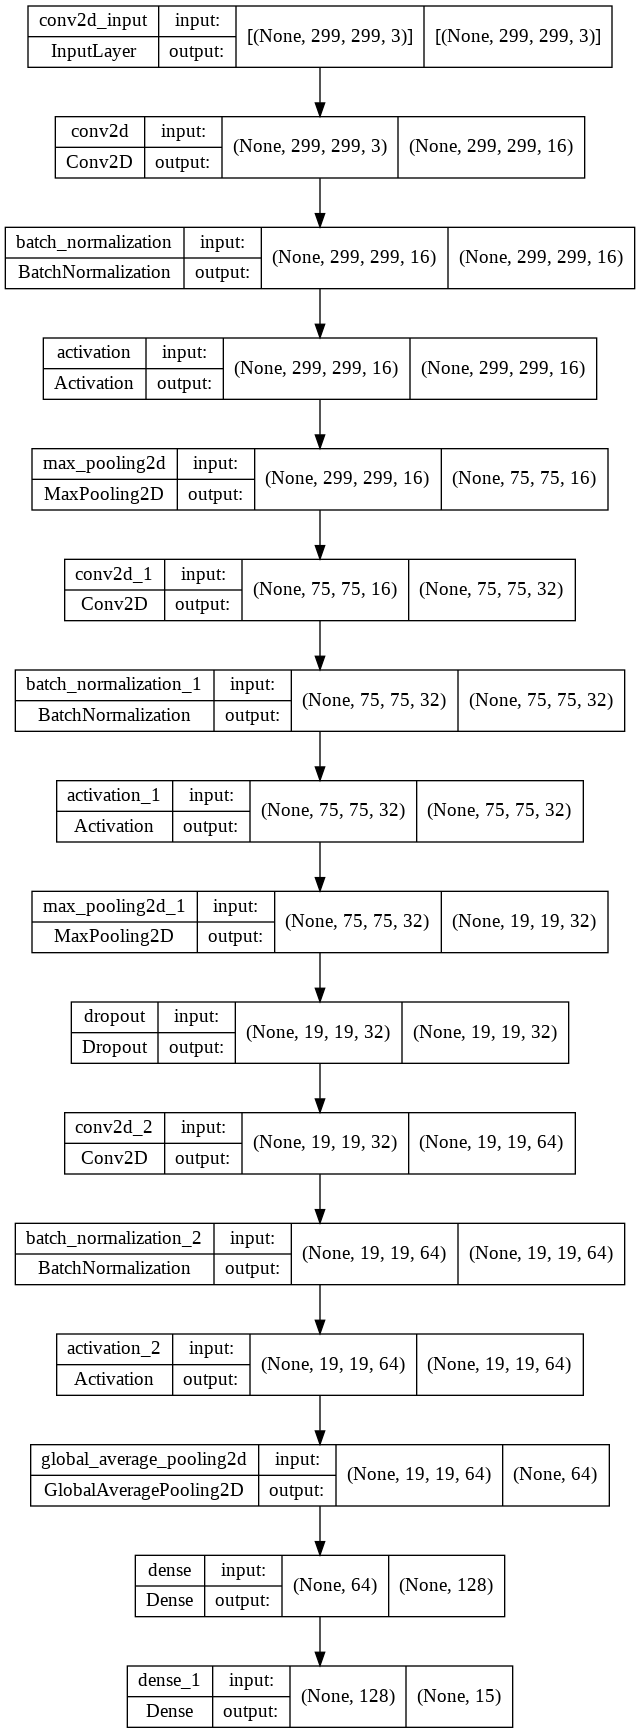

In [ ]:
K.clear_session()
model = Sequential()
# Convolution layer
model.add(Conv2D(filters=16,
                 kernel_size=(3,3), 
                 padding='same',
                 use_bias=False,
                 input_shape=(299,299,3)))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation('relu'))
# Pooling layer
model.add(MaxPooling2D(pool_size=(4, 4),
                       strides=(4, 4),
                       padding='same'))
# Second convolution layer
model.add(Conv2D(filters=32,
                 kernel_size=(3,3), 
                 padding='same',
                 use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))
# Third convolution layer
model.add(Conv2D(filters=64,
                 kernel_size=(3,3), 
                 padding='same',
                 use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D())
# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(num_breeds, activation='softmax'))
plot_model(model, to_file='CNN_model_plot.png', 
           show_shapes=True, show_layer_names=True)

In [ ]:
# Paramétrage de l'optimizer
opt = keras.optimizers.Adam(learning_rate=0.1e-3)

#Compilation du modèle
model.compile(optimizer=opt,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", f1_m])

NameError: ignored

### Fonction pour arreter le modèle quand Val_loss ne progressse plus
* Patience = nombre d'epoch sans variation
* monitor = Metrique que l'on veut challenger
* min_delta = Variation sur la variable
* mode = sens de la variation
* verbose : mode pour débugger
* cooldown : Nombre d'Epoch sans faire de réduction après en avoir réalisée une
* Factor : dimunition du learning rate newlr = lr * factor

In [17]:
#Fonction pour arreter l'apprentissage quand la variation n'est plus très importante
arret_val_loss = EarlyStopping (patience = 6,
                                min_delta = 0.01,
                                monitor = 'val_loss',
                                mode = 'min',
                                verbose = 1)

#Fonction pour réduire la valeur du learning rate quand val_loss ne progresse plus bcp
reduction_lr = ReduceLROnPlateau (factor = 0.1,
                                  cooldown = 5,
                                  patience = 5,
                                  min_lr = 0.1e-6,
                                  monitor = 'val_loss',
                                  mode = 'min',
                                  verbose = 1)

callbacks = [arret_val_loss,reduction_lr]

#Revoir la patience

In [ ]:
history = model.fit(
    train_datagen.flow(
        x_train, y_train,
        batch_size=16,
        subset='training'),
    validation_data=train_datagen.flow(
        x_train, y_train,
        batch_size=16,
        subset='validation'),
    steps_per_epoch=len(x_train) / 32,
    epochs=20,
    callbacks = callbacks,
    verbose=2)

Epoch 1/20
63/63 - 36s - loss: 2.7269 - accuracy: 0.0714 - f1_m: 14.5519 - val_loss: 2.7002 - val_accuracy: 0.0720 - val_f1_m: 14.5540 - lr: 1.0000e-04 - 36s/epoch - 577ms/step
Epoch 2/20
63/63 - 26s - loss: 2.6916 - accuracy: 0.0781 - f1_m: 14.9287 - val_loss: 2.6972 - val_accuracy: 0.0744 - val_f1_m: 14.3048 - lr: 1.0000e-04 - 26s/epoch - 407ms/step
Epoch 3/20
63/63 - 24s - loss: 2.6646 - accuracy: 0.1045 - f1_m: 15.1498 - val_loss: 2.6951 - val_accuracy: 0.0620 - val_f1_m: 14.3932 - lr: 1.0000e-04 - 24s/epoch - 387ms/step
Epoch 4/20
63/63 - 25s - loss: 2.6561 - accuracy: 0.1162 - f1_m: 14.6337 - val_loss: 2.6873 - val_accuracy: 0.0868 - val_f1_m: 13.8502 - lr: 1.0000e-04 - 25s/epoch - 390ms/step
Epoch 5/20
63/63 - 24s - loss: 2.6428 - accuracy: 0.1155 - f1_m: 14.6790 - val_loss: 2.6737 - val_accuracy: 0.0993 - val_f1_m: 14.0709 - lr: 1.0000e-04 - 24s/epoch - 384ms/step
Epoch 6/20
63/63 - 24s - loss: 2.6332 - accuracy: 0.1318 - f1_m: 14.5654 - val_loss: 2.6657 - val_accuracy: 0.1017 

In [23]:
def plot_history_scores(nomModel,dict_history, first_score, second_score):
    with plt.style.context('seaborn-whitegrid'):
        fig = plt.figure(figsize=(25,10))
        # summarize history for accuracy
        plt.subplot(1, 2, 1)
        plt.plot(dict_history.history[first_score], color="g")
        plt.plot(dict_history.history['val_' + first_score],
                 linestyle='--', color="orange")
        plt.title(nomModel + ' ' + first_score, fontsize=18)
        plt.ylabel(first_score)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        # summarize history for f1_m
        plt.subplot(1, 2,2)
        plt.plot(dict_history.history[second_score], color="g")
        plt.plot(dict_history.history['val_' + second_score],
                 linestyle='--', color="orange")
        plt.title(nomModel + ' ' + second_score, fontsize=18)
        plt.ylabel(second_score)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()

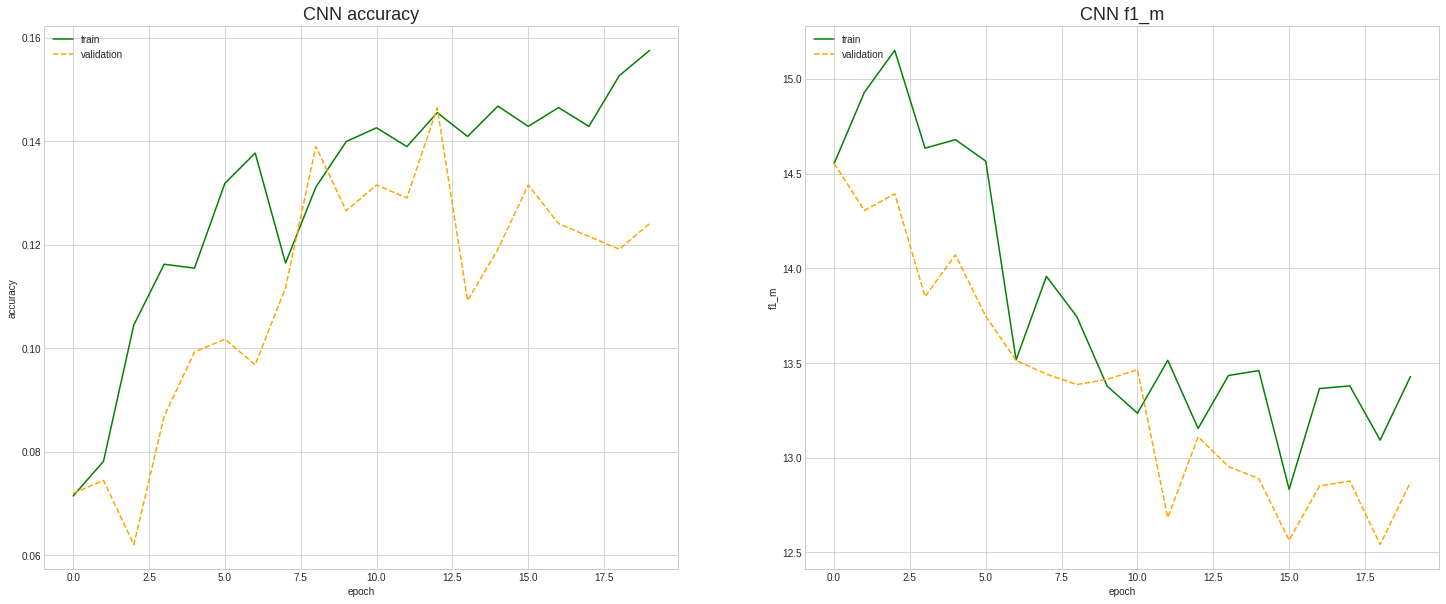

In [ ]:
plot_history_scores(
    'CNN',
    dict_history = history, 
    first_score = "accuracy", 
    second_score = "f1_m")

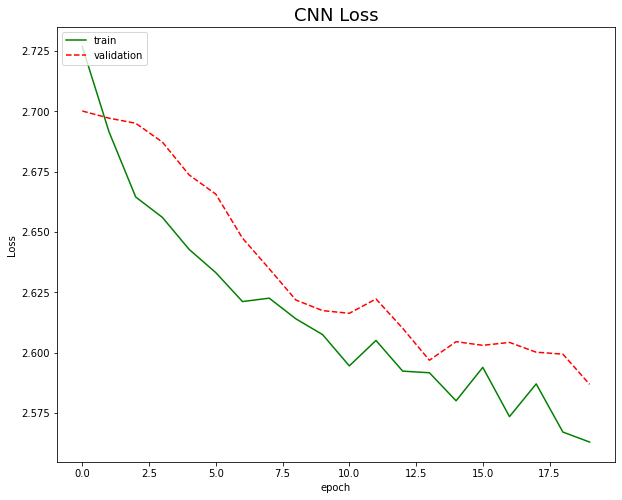

In [ ]:
 # summarize history for loss
fig = plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], color="g")
plt.plot(history.history['val_loss'],
                 linestyle='--', color="red")
plt.title('CNN Loss' , fontsize=18)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Resnet50
Transfert Learning avec ResNet50.
Son architecture est la suivante :

In [18]:
# Paramétrage de l'optimizer
opt = keras.optimizers.Adam(learning_rate=0.1e-3)

K.clear_session()
# Import ResNet50 trained model
resnet_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False, 
    pooling='avg',
    input_shape=(299,299,3))

# Dont retrain layers
for rn_layer in resnet_model.layers:
    rn_layer.trainable = False
    
# Add new fully-connected layers
rn_base_output = resnet_model.output
rn_base_output = Dense(128, activation='relu')(rn_base_output)
rn_base_output = Dropout(0.2)(rn_base_output)
# Output : new classifier
rn_predictions = Dense(num_breeds, activation='softmax')(rn_base_output)

# Define new model
my_resnet_model = Model(inputs=resnet_model.input,
                        outputs=rn_predictions)
my_resnet_model.compile(optimizer=opt,
                       loss="sparse_categorical_crossentropy",
                       metrics=["accuracy", f1_m])

# Data generator on train set with Data Augmentation
# and preprocess_input Resnet
# Validation set is define here
rn_train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    preprocessing_function=tf.keras.applications.resnet.preprocess_input)

#For validation and test, just rescale
rn_test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input)

94781440/94765736 [==============================] - 2s 0us/step


In [19]:
history_resnet = my_resnet_model.fit(
    rn_train_datagen.flow(
        x_train, y_train,
        batch_size=16,
        subset='training'),
    validation_data=rn_train_datagen.flow(
        x_train, y_train,
        batch_size=16,
        subset='validation'),
    steps_per_epoch=len(x_train) / 32,
    epochs=40,
    callbacks = callbacks,
    verbose=2)

Epoch 1/40
63/63 - 56s - loss: 2.6449 - accuracy: 0.1301 - f1_m: 11.2485 - val_loss: 2.4808 - val_accuracy: 0.1861 - val_f1_m: 11.4304 - lr: 1.0000e-04 - 56s/epoch - 890ms/step
Epoch 2/40
63/63 - 34s - loss: 2.3677 - accuracy: 0.2524 - f1_m: 10.3825 - val_loss: 2.1679 - val_accuracy: 0.3151 - val_f1_m: 10.2458 - lr: 1.0000e-04 - 34s/epoch - 544ms/step
Epoch 3/40
63/63 - 34s - loss: 2.0545 - accuracy: 0.3366 - f1_m: 8.6951 - val_loss: 1.9299 - val_accuracy: 0.3995 - val_f1_m: 9.0263 - lr: 1.0000e-04 - 34s/epoch - 541ms/step
Epoch 4/40
63/63 - 34s - loss: 1.8515 - accuracy: 0.3945 - f1_m: 7.5115 - val_loss: 1.7679 - val_accuracy: 0.4715 - val_f1_m: 8.3655 - lr: 1.0000e-04 - 34s/epoch - 536ms/step
Epoch 5/40
63/63 - 33s - loss: 1.6793 - accuracy: 0.4834 - f1_m: 6.5533 - val_loss: 1.6469 - val_accuracy: 0.4864 - val_f1_m: 6.8810 - lr: 1.0000e-04 - 33s/epoch - 526ms/step
Epoch 6/40
63/63 - 33s - loss: 1.5536 - accuracy: 0.5264 - f1_m: 5.7507 - val_loss: 1.5356 - val_accuracy: 0.5062 - val_f

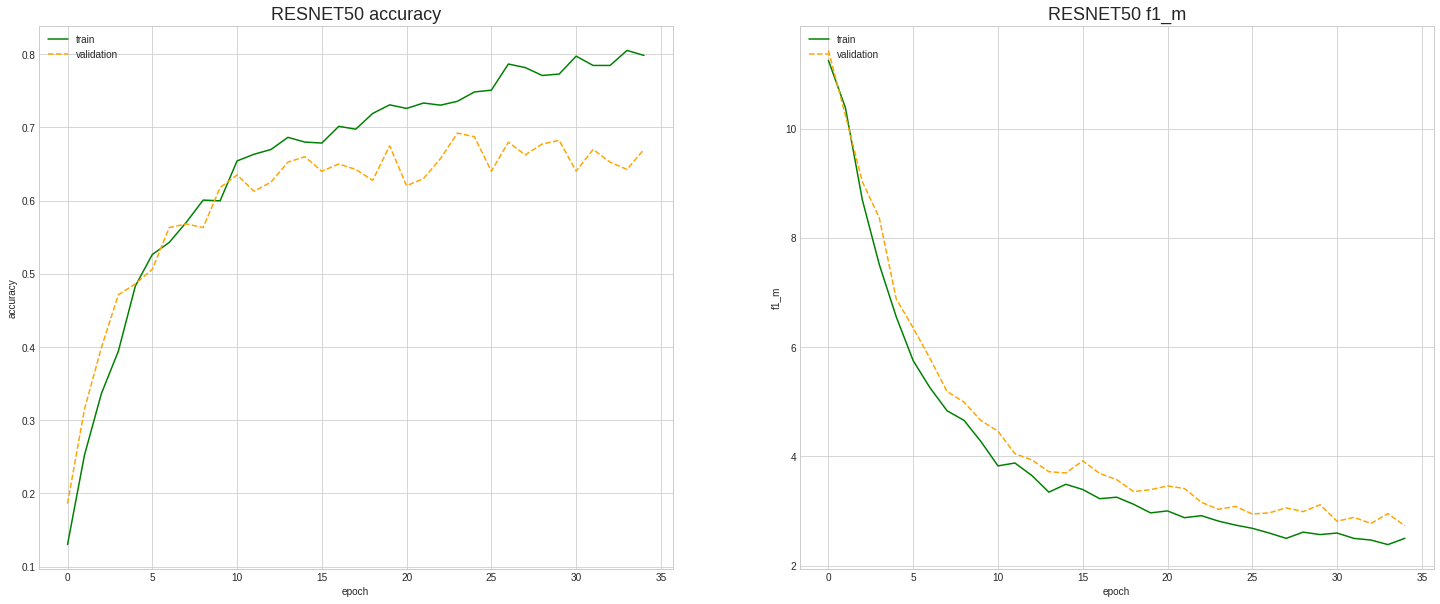

In [24]:
plot_history_scores(
    'RESNET50',
    dict_history = history_resnet, 
    first_score = "accuracy",
    second_score = "f1_m")

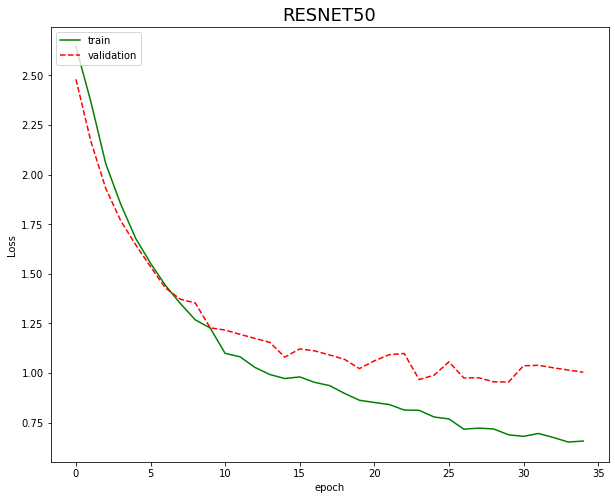

In [25]:
 # summarize history for loss
fig = plt.figure(figsize=(10,8))
plt.plot(history_resnet.history['loss'], color="g")
plt.plot(history_resnet.history['val_loss'],
                 linestyle='--', color="red")
plt.title('RESNET50' , fontsize=18)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
history_resnet.model.save("/content/drive/MyDrive/FORMATION/P7/monModele.h5")

### EfficientBO
Transfert Learning avec EfficientBO. Son architecture est la suivante :

In [ ]:
# Paramétrage de l'optimizer
opt = keras.optimizers.Adam(learning_rate=0.1e-3)

K.clear_session()
# Import EfficientNet  trained model
efficientNet_model = tf.keras.applications.EfficientNetB0(
    weights='imagenet',
    include_top=False, 
    pooling='avg',
    input_shape=(299,299,3))

# Dont retrain layers
for ef_layer in efficientNet_model.layers:
    ef_layer.trainable = False
    
# Add new fully-connected layers
ef_base_output = efficientNet_model.output
ef_base_output = Dense(128, activation='relu')(ef_base_output)
ef_base_output = Dropout(0.2)(ef_base_output)
# Output : new classifier
ef_predictions = Dense(num_breeds, activation='softmax')(ef_base_output)

# Define new model
my_efficient_model = Model(inputs=efficientNet_model.input,
                        outputs=ef_predictions)
my_efficient_model.compile(optimizer=opt,
                       loss="sparse_categorical_crossentropy",
                       metrics=["accuracy", f1_m])

# Data generator on train set with Data Augmentation
# and preprocess_input Resnet
# Validation set is define here
ef_train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)

#For validation and test, just rescale
ef_test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)

In [ ]:
history_efficientnet = my_efficient_model.fit(
    ef_train_datagen.flow(
        x_train, y_train,
        batch_size=16,
        subset='training'),
    validation_data=ef_train_datagen.flow(
        x_train, y_train,
        batch_size=16,
        subset='validation'),
    steps_per_epoch=len(x_train) / 32,
    epochs=40,
    callbacks = callbacks,
    verbose=2)

Epoch 1/40
63/63 - 141s - loss: 2.6710 - accuracy: 0.1328 - f1_m: 13.0369 - val_loss: 2.4733 - val_accuracy: 0.2432 - val_f1_m: 13.0372 - lr: 1.0000e-04 - 141s/epoch - 2s/step
Epoch 2/40
63/63 - 131s - loss: 2.3664 - accuracy: 0.2789 - f1_m: 12.6419 - val_loss: 2.2239 - val_accuracy: 0.4144 - val_f1_m: 12.0389 - lr: 1.0000e-04 - 131s/epoch - 2s/step
Epoch 3/40
63/63 - 134s - loss: 2.1008 - accuracy: 0.4237 - f1_m: 11.2148 - val_loss: 1.9240 - val_accuracy: 0.5261 - val_f1_m: 10.4770 - lr: 1.0000e-04 - 134s/epoch - 2s/step
Epoch 4/40
63/63 - 135s - loss: 1.8650 - accuracy: 0.4834 - f1_m: 9.6462 - val_loss: 1.7212 - val_accuracy: 0.5658 - val_f1_m: 9.2274 - lr: 1.0000e-04 - 135s/epoch - 2s/step
Epoch 5/40
63/63 - 133s - loss: 1.6988 - accuracy: 0.5127 - f1_m: 8.4439 - val_loss: 1.5496 - val_accuracy: 0.5856 - val_f1_m: 7.6375 - lr: 1.0000e-04 - 133s/epoch - 2s/step
Epoch 6/40
63/63 - 133s - loss: 1.5436 - accuracy: 0.5597 - f1_m: 7.0622 - val_loss: 1.4603 - val_accuracy: 0.5955 - val_f1_

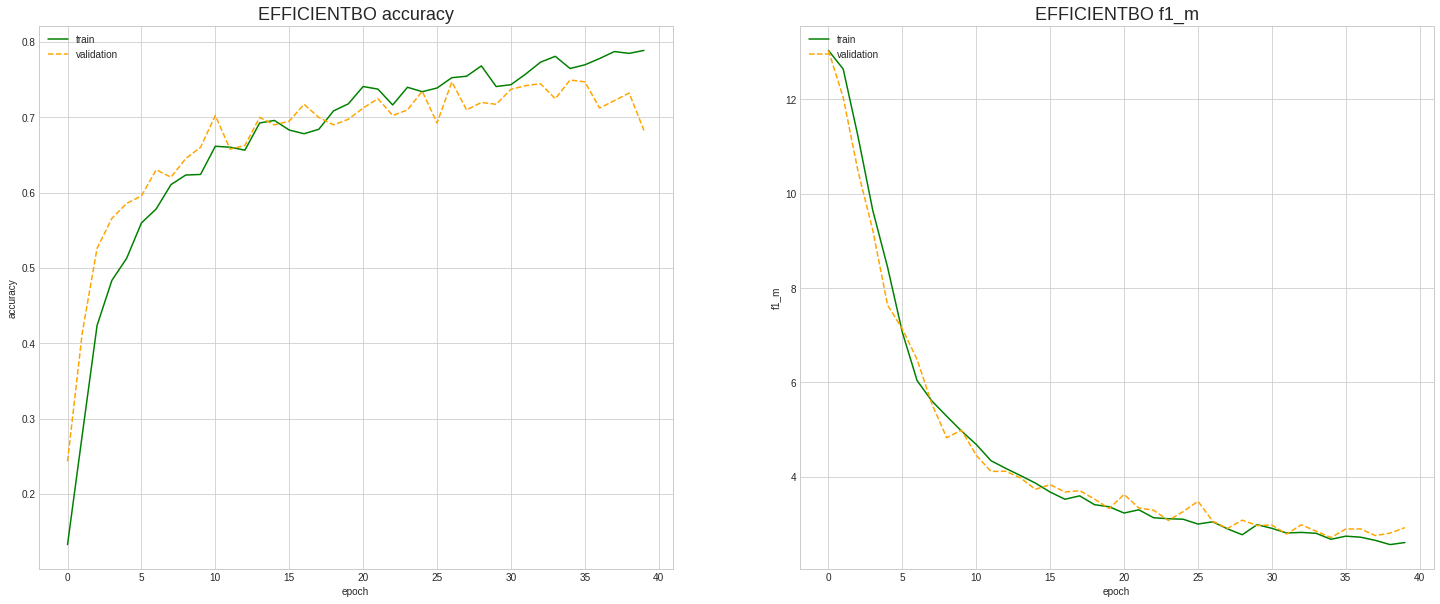

In [ ]:
plot_history_scores(
    'EFFICIENTBO',
    dict_history = history_efficientnet, 
    first_score = "accuracy", 
    second_score = "f1_m")

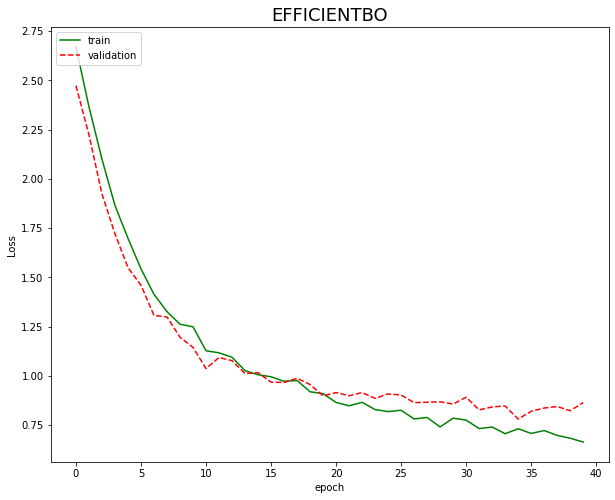

In [ ]:
 # summarize history for loss
fig = plt.figure(figsize=(10,8))
plt.plot(history_efficientnet.history['loss'], color="g")
plt.plot(history_efficientnet.history['val_loss'],
                 linestyle='--', color="red")
plt.title('EFFICIENTBO' , fontsize=18)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()